In [1]:
import pandas as pd
import re

# File paths for all NHANES cycles
file_paths = [
    r"D:\Big Data Analysis and Project\NHANES\merged_2007_2008(in).csv",
    r"D:\Big Data Analysis and Project\NHANES\merged_2009_2010(in).csv",
    r"D:\Big Data Analysis and Project\NHANES\merged_2011_2012(in).csv",
    r"D:\Big Data Analysis and Project\NHANES\merged_2013_2014(in).csv",
    r"D:\Big Data Analysis and Project\NHANES\merged_2015_2016 2(in).csv",
    r"D:\Big Data Analysis and Project\NHANES\Merged Dataset Cycle 2017-2020(in).csv"
]

# Clean column suffixes like _x, _y, _z
def clean_column_suffixes(df):
    return df.rename(columns=lambda col: re.sub(r'_[xyz]$', '', col))

# Initialize merged dataframe
merged_df = None

# Process each file
for file in file_paths:
    df = pd.read_csv(file)
    df = clean_column_suffixes(df)

    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on="SEQN", how="outer", suffixes=('', '_dup'))

        # Resolve duplicate columns
        dup_cols = [col for col in merged_df.columns if col.endswith('_dup')]
        for col in dup_cols:
            base_col = col[:-4]
            if base_col in merged_df.columns:
                merged_df[base_col] = merged_df[base_col].combine_first(merged_df[col])
                merged_df.drop(columns=[col], inplace=True)
            else:
                merged_df.rename(columns={col: base_col}, inplace=True)

# Save the merged dataset (unrenamed)
output_path = r"D:\Big Data Analysis and Project\NHANES\NHANES_Combined_2007_to_2020_Final_SAFE.csv"
merged_df.to_csv(output_path, index=False)

print("✅ Merge complete! Shape:", merged_df.shape)
print("✅ File saved at:", output_path)


✅ Merge complete! Shape: (66148, 40)
✅ File saved at: D:\Big Data Analysis and Project\NHANES\NHANES_Combined_2007_to_2020_Final_SAFE.csv


In [3]:
# Load your final merged dataset
df = pd.read_csv(r"D:\Big Data Analysis and Project\NHANES\NHANES_Combined_2007_to_2020_Final_SAFE.csv")

# Rename selected columns with meaningful names
df.rename(columns={
    'SEQN': 'Respondent Sequence Number',
    'BMXWT': 'Weight (kg)',
    'BMXHT': 'Standing Height (cm)',
    'BMXBMI': 'Body Mass Index (kg/m²)',
    'BMXWAIST': 'Waist Circumference (cm)',
    'BPXPLS': 'Pulse Rate (60 sec)',
    'BPXSY1': 'Systolic BP (1st Reading) (mm Hg)',
    'BPXDI1': 'Diastolic BP (1st Reading) (mm Hg)',
    'BPXSY2': 'Systolic BP (2nd Reading) (mm Hg)',
    'BPXDI2': 'Diastolic BP (2nd Reading) (mm Hg)',
    'BPXSY3': 'Systolic BP (3rd Reading) (mm Hg)',
    'BPXDI3': 'Diastolic BP (3rd Reading) (mm Hg)',
    'LBXCOT': 'Serum Cotinine (ng/mL)',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age (Years)',
    'RIDRETH1': 'Race/Ethnicity (Basic Categories)',
    'DMDBORN2': 'Country of Birth (Recode)',
    'DMDEDUC2': 'Education Level (Adults 20+)',
    'INDFMPIR': 'Poverty Income Ratio',
    'LBXGH': 'Glycohemoglobin (%)',
    'LBXGLU': 'Fasting Glucose (mg/dL)',
    'LBDHDD': 'HDL Cholesterol (mg/dL)',
    'MCQ010': 'Ever Told You Had Asthma',
    'MCQ160B': 'Ever Told Had Congestive Heart Failure',
    'MCQ160C': 'Ever Told Had Coronary Heart Disease',
    'MCQ160D': 'Ever Told Had Angina',
    'MCQ160E': 'Ever Told Had Heart Attack',
    'MCQ160F': 'Ever Told Had Stroke',
    'SMQ020': 'Smoked ≥100 Cigarettes in Life',
    'SMD030': 'Age Started Smoking Regularly',
    'SMQ040': 'Currently Smoke Cigarettes',
    'SMD641': '# Days Smoked in Past 30 Days',
    'SMD650': 'Avg # Cigarettes/Day (Past 30 Days)',
    'LBXTC': 'Total Cholesterol (mg/dL)',
    'LBXTR': 'Triglycerides (mg/dL)',
    'LBDLDL': 'LDL Cholesterol (mg/dL)',
    'RIDRETH3': 'Race/Ethnicity (Detailed w/ Asian)',
    'DMDBORN4': 'Country of Birth (Detailed)',
    'SMQ078': 'Time to First Cigarette After Waking',
    'LBDTRSI': 'Triglycerides (mmol/L)'
}, inplace=True)

# Save the renamed DataFrame
df.to_csv(r"D:\Big Data Analysis and Project\NHANES\NHANES_Combined_2007_to_2020_Final_RENAMED.csv", index=False)

print("✅ Renaming complete. File saved with meaningful column names.")


✅ Renaming complete. File saved with meaningful column names.


In [5]:
df = pd.read_csv("NHANES_Combined_2007_to_2020_Final_RENAMED.csv") 
total_cells = df.size
missing_cells = df.isnull().sum().sum()
missing_percent = (missing_cells / total_cells) * 100

print(f"Total missing values: {missing_cells}")
print(f"Overall missing percentage: {missing_percent:.2f}%")


Total missing values: 1128963
Overall missing percentage: 42.67%


In [7]:
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
missing_percent = (missing_summary / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage (%)': missing_percent.round(2)
}).sort_values(by='Missing Percentage (%)', ascending=False)

print(missing_df)


                                        Missing Count  Missing Percentage (%)
Time to First Cigarette After Waking            63026                   95.28
Triglycerides (mmol/L)                          61498                   92.97
Avg # Cigarettes/Day (Past 30 Days)             57904                   87.54
# Days Smoked in Past 30 Days                   57374                   86.74
Currently Smoke Cigarettes                      49221                   74.41
Age Started Smoking Regularly                   49221                   74.41
LDL Cholesterol (mg/dL)                         46442                   70.21
Triglycerides (mg/dL)                           46183                   69.82
Fasting Glucose (mg/dL)                         45731                   69.13
Race/Ethnicity (Basic Categories)               45462                   68.73
Country of Birth (Recode)                       45462                   68.73
Diastolic BP (1st Reading) (mm Hg)              30399           

In [9]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


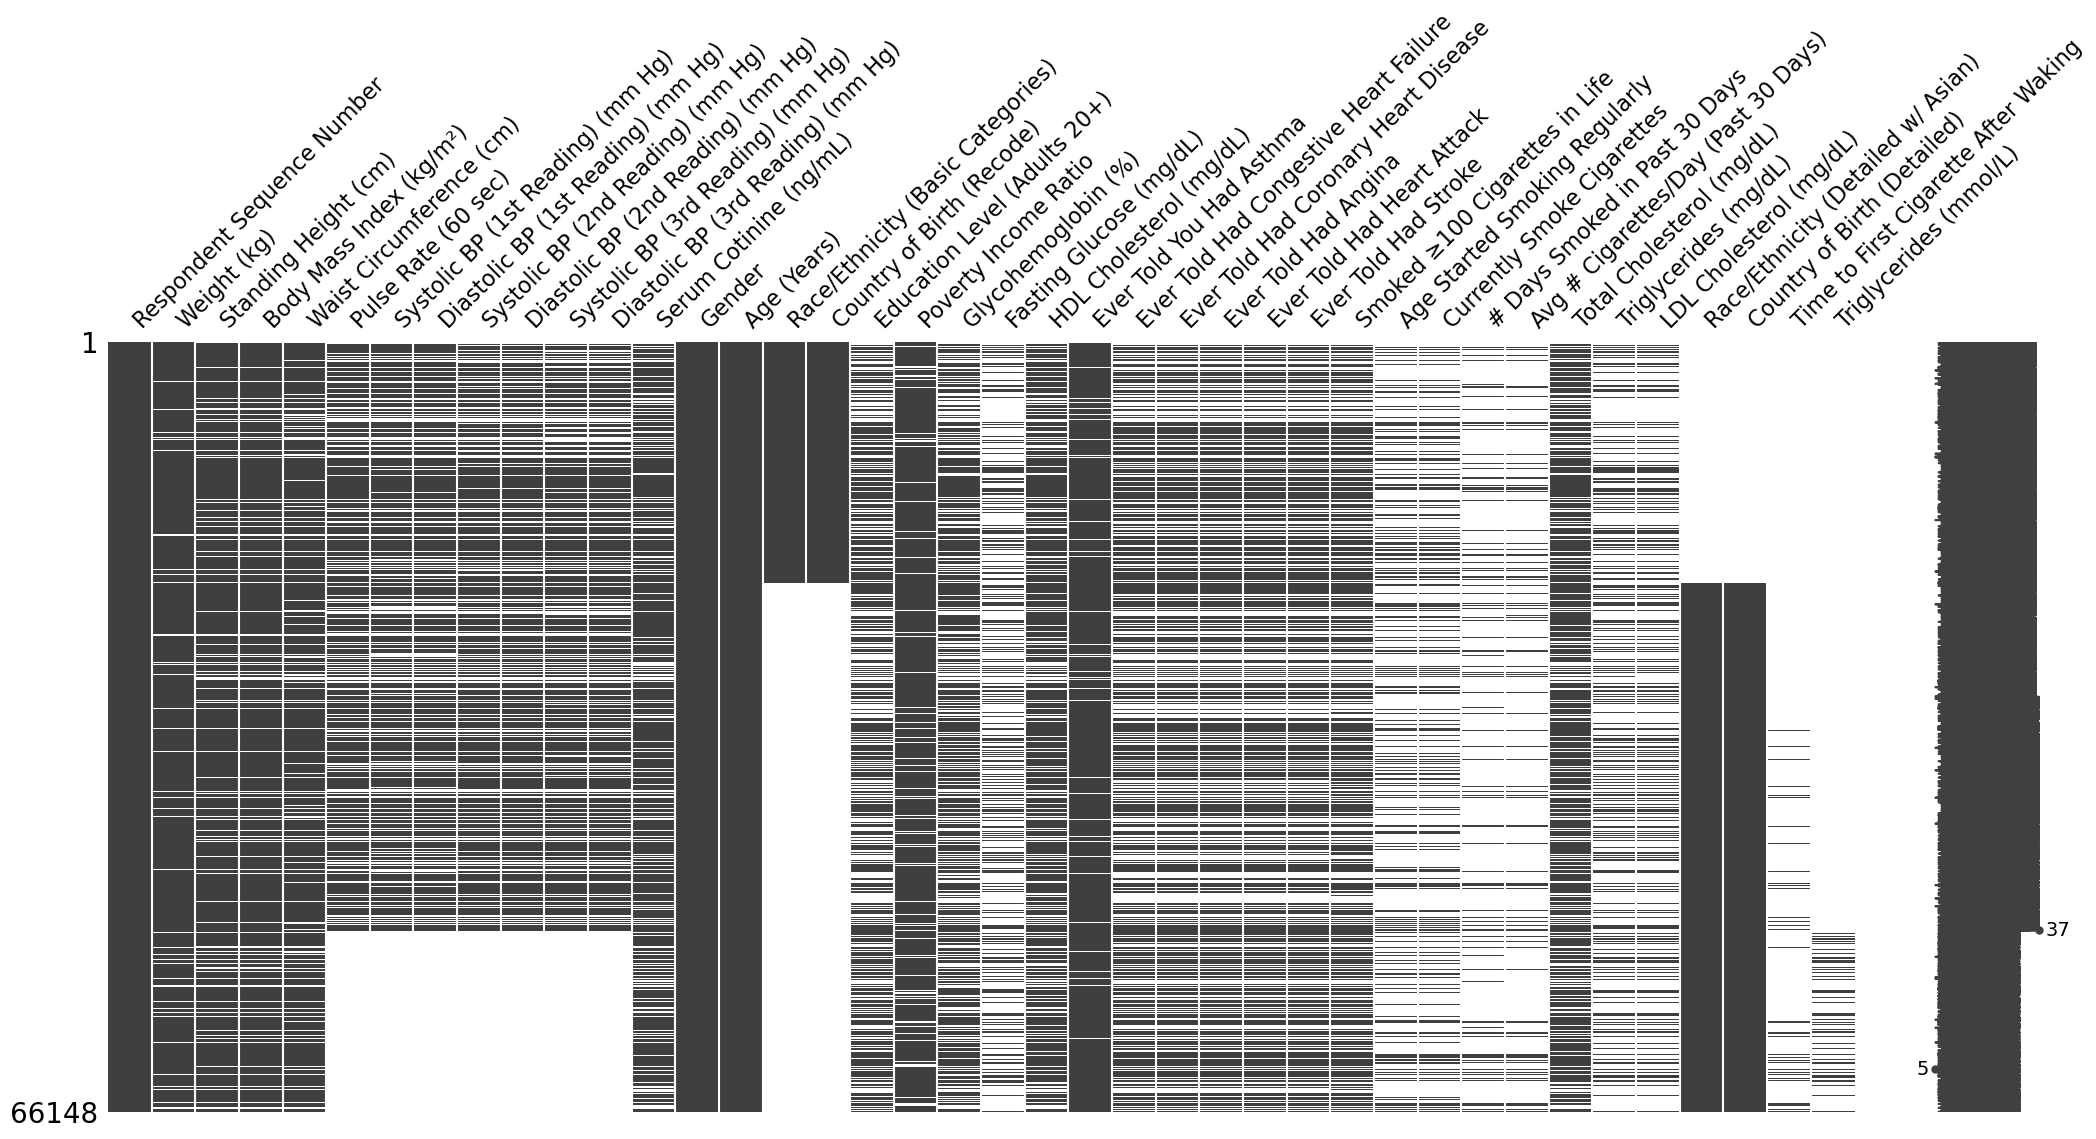

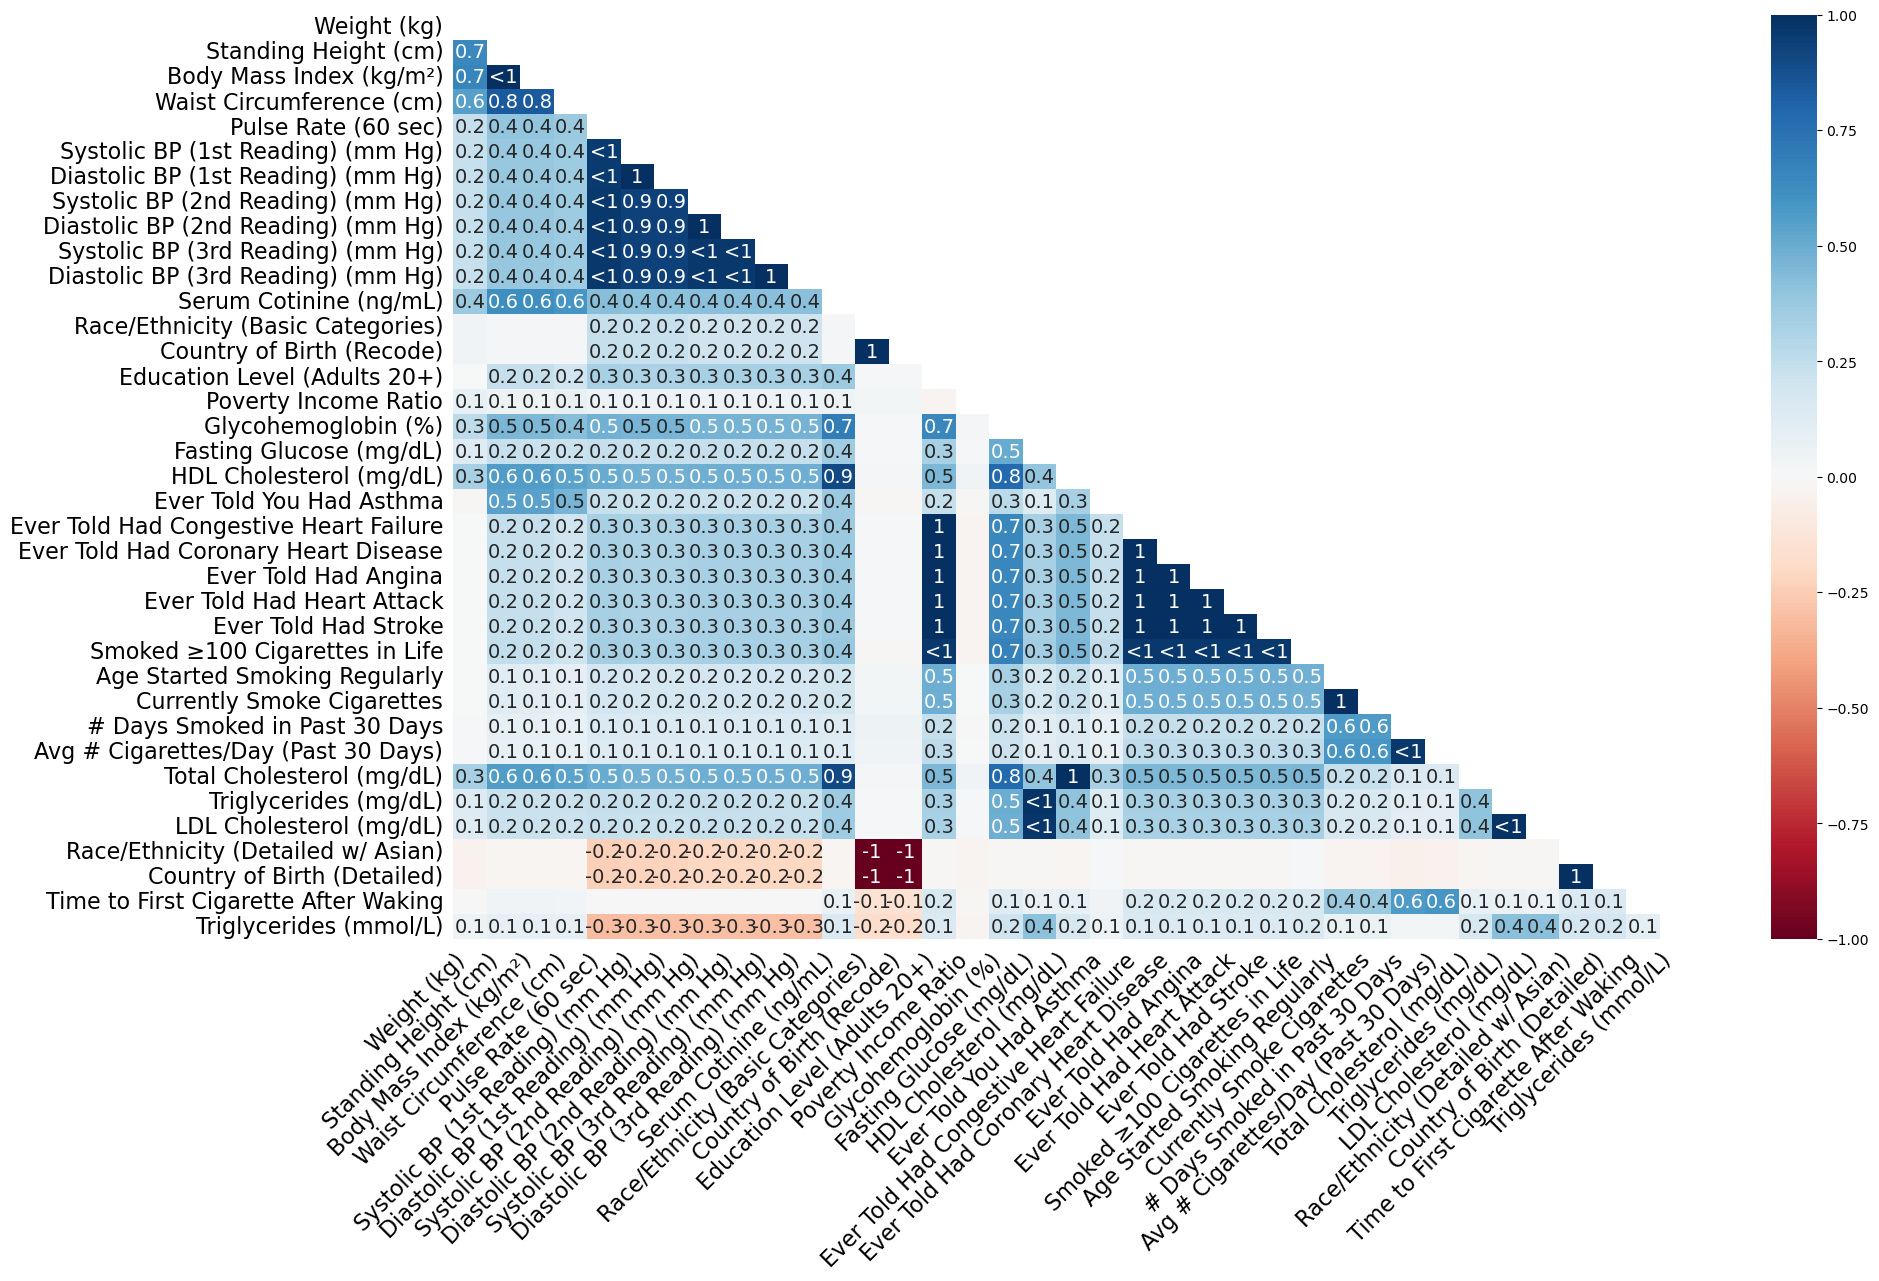

In [11]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()


In [13]:
df['Missing_Count'] = df.isnull().sum(axis=1)
rows_with_missing = df[df['Missing_Count'] > 0]
print(rows_with_missing.head())


   Respondent Sequence Number  Weight (kg)  Standing Height (cm)  \
0                       41475        138.9                 154.7   
1                       41476         22.0                 120.4   
2                       41477         83.9                 167.1   
3                       41478         11.5                   NaN   
4                       41479         65.7                 154.4   

   Body Mass Index (kg/m²)  Waist Circumference (cm)  Pulse Rate (60 sec)  \
0                    58.04                     156.3                 66.0   
1                    15.18                      52.7                  NaN   
2                    30.05                     109.5                 78.0   
3                      NaN                       NaN                  NaN   
4                    27.56                      95.4                 62.0   

   Systolic BP (1st Reading) (mm Hg)  Diastolic BP (1st Reading) (mm Hg)  \
0                              128.0                

In [15]:

# Load your renamed dataset (adjust the path if needed)
df = pd.read_csv("NHANES_Combined_2007_to_2020_Final_RENAMED.csv")

# Calculate Systolic BP Average (using all available readings)
df['Systolic BP (Avg)'] = df[[
    'Systolic BP (1st Reading) (mm Hg)',
    'Systolic BP (2nd Reading) (mm Hg)',
    'Systolic BP (3rd Reading) (mm Hg)'
]].mean(axis=1, skipna=True)

# Calculate Diastolic BP Average
df['Diastolic BP (Avg)'] = df[[
    'Diastolic BP (1st Reading) (mm Hg)',
    'Diastolic BP (2nd Reading) (mm Hg)',
    'Diastolic BP (3rd Reading) (mm Hg)'
]].mean(axis=1, skipna=True)

# Save the updated dataset with new average columns
df.to_csv("NHANES_With_BP_Averages.csv", index=False)

# Confirm how many rows still have missing average BP
missing_sys = df['Systolic BP (Avg)'].isnull().sum()
missing_dia = df['Diastolic BP (Avg)'].isnull().sum()

print(f"✅ Systolic BP (Avg) missing in: {missing_sys} rows")
print(f"✅ Diastolic BP (Avg) missing in: {missing_dia} rows")
print("✅ Averages created and saved to: NHANES_With_BP_Averages.csv")


✅ Systolic BP (Avg) missing in: 29045 rows
✅ Diastolic BP (Avg) missing in: 29045 rows
✅ Averages created and saved to: NHANES_With_BP_Averages.csv


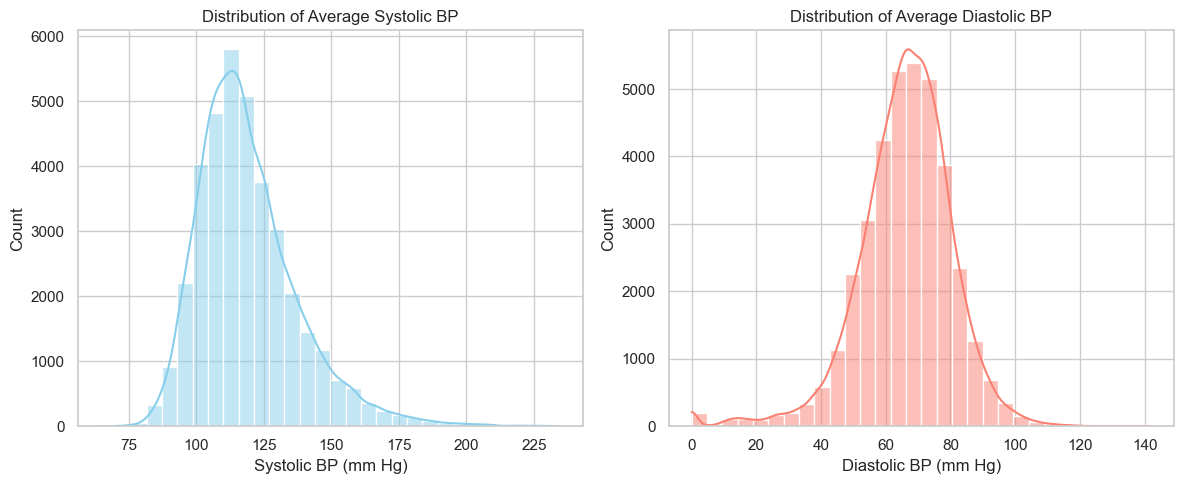

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and plot both histograms
plt.figure(figsize=(12, 5))

# Systolic BP
plt.subplot(1, 2, 1)
sns.histplot(df['Systolic BP (Avg)'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Average Systolic BP")
plt.xlabel("Systolic BP (mm Hg)")
plt.ylabel("Count")

# Diastolic BP
plt.subplot(1, 2, 2)
sns.histplot(df['Diastolic BP (Avg)'], bins=30, kde=True, color="salmon")
plt.title("Distribution of Average Diastolic BP")
plt.xlabel("Diastolic BP (mm Hg)")
plt.ylabel("Count")

# ✅ Save the figure BEFORE showing it
plt.tight_layout()
plt.savefig("BP_Distribution_Histograms.png", dpi=300, bbox_inches='tight')

# ✅ Now show it
plt.show()


In [1]:
import pandas as pd

# Load the dataset (adjust path if needed)
df = pd.read_csv("NHANES_With_BP_Averages.csv")

# Make a working copy
cleaned_df = df.copy()

In [3]:
# Drop columns with more than 85% missing values
columns_to_drop = cleaned_df.columns[cleaned_df.isnull().mean() > 0.85]
print("Dropped columns (more than 85% missing):")
print(columns_to_drop.tolist())

cleaned_df.drop(columns=columns_to_drop, inplace=True)


Dropped columns (more than 85% missing):
['# Days Smoked in Past 30 Days', 'Avg # Cigarettes/Day (Past 30 Days)', 'Time to First Cigarette After Waking', 'Triglycerides (mmol/L)']


In [5]:
# Drop rows where Serum Cotinine (target variable) is missing
cleaned_df = cleaned_df[cleaned_df['Serum Cotinine (ng/mL)'].notnull()]

# Drop rows where average BP is missing (created earlier)
cleaned_df = cleaned_df[
    cleaned_df['Systolic BP (Avg)'].notnull() &
    cleaned_df['Diastolic BP (Avg)'].notnull()
]

print("Remaining rows after dropping target/BP missing:", cleaned_df.shape[0])


Remaining rows after dropping target/BP missing: 34294


In [7]:
# Impute missing numerical values with mean
num_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    if cleaned_df[col].isnull().sum() > 0:
        mean_val = cleaned_df[col].mean()
        cleaned_df[col].fillna(mean_val, inplace=True)
        print(f"Imputed numerical column: {col}")


Imputed numerical column: Weight (kg)
Imputed numerical column: Standing Height (cm)
Imputed numerical column: Body Mass Index (kg/m²)
Imputed numerical column: Waist Circumference (cm)
Imputed numerical column: Pulse Rate (60 sec)
Imputed numerical column: Systolic BP (1st Reading) (mm Hg)
Imputed numerical column: Diastolic BP (1st Reading) (mm Hg)
Imputed numerical column: Systolic BP (2nd Reading) (mm Hg)
Imputed numerical column: Diastolic BP (2nd Reading) (mm Hg)
Imputed numerical column: Systolic BP (3rd Reading) (mm Hg)
Imputed numerical column: Diastolic BP (3rd Reading) (mm Hg)
Imputed numerical column: Race/Ethnicity (Basic Categories)
Imputed numerical column: Country of Birth (Recode)
Imputed numerical column: Education Level (Adults 20+)
Imputed numerical column: Poverty Income Ratio
Imputed numerical column: Glycohemoglobin (%)
Imputed numerical column: Fasting Glucose (mg/dL)
Imputed numerical column: HDL Cholesterol (mg/dL)
Imputed numerical column: Ever Told Had Conge

C:\Users\pritt\AppData\Local\Temp\ipykernel_22724\3091893333.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df[col].fillna(mean_val, inplace=True)


In [13]:
# Impute missing categorical values with mode
cat_cols = cleaned_df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if cleaned_df[col].isnull().sum() > 0:
        mode_val = cleaned_df[col].mode()[0]
        cleaned_df[col].fillna(mode_val, inplace=True)
        print(f"Imputed categorical column: {col}")

In [23]:
# Final check — make sure no missing values left
print("Total missing values after cleaning:", cleaned_df.isnull().sum().sum())

# Save cleaned file
cleaned_df.to_csv("NHANES_Cleaned_Ready.csv", index=False)
print("✅ Cleaned dataset saved as NHANES_Cleaned_Ready.csv")


Total missing values after cleaning: 0
✅ Cleaned dataset saved as NHANES_Cleaned_Ready.csv


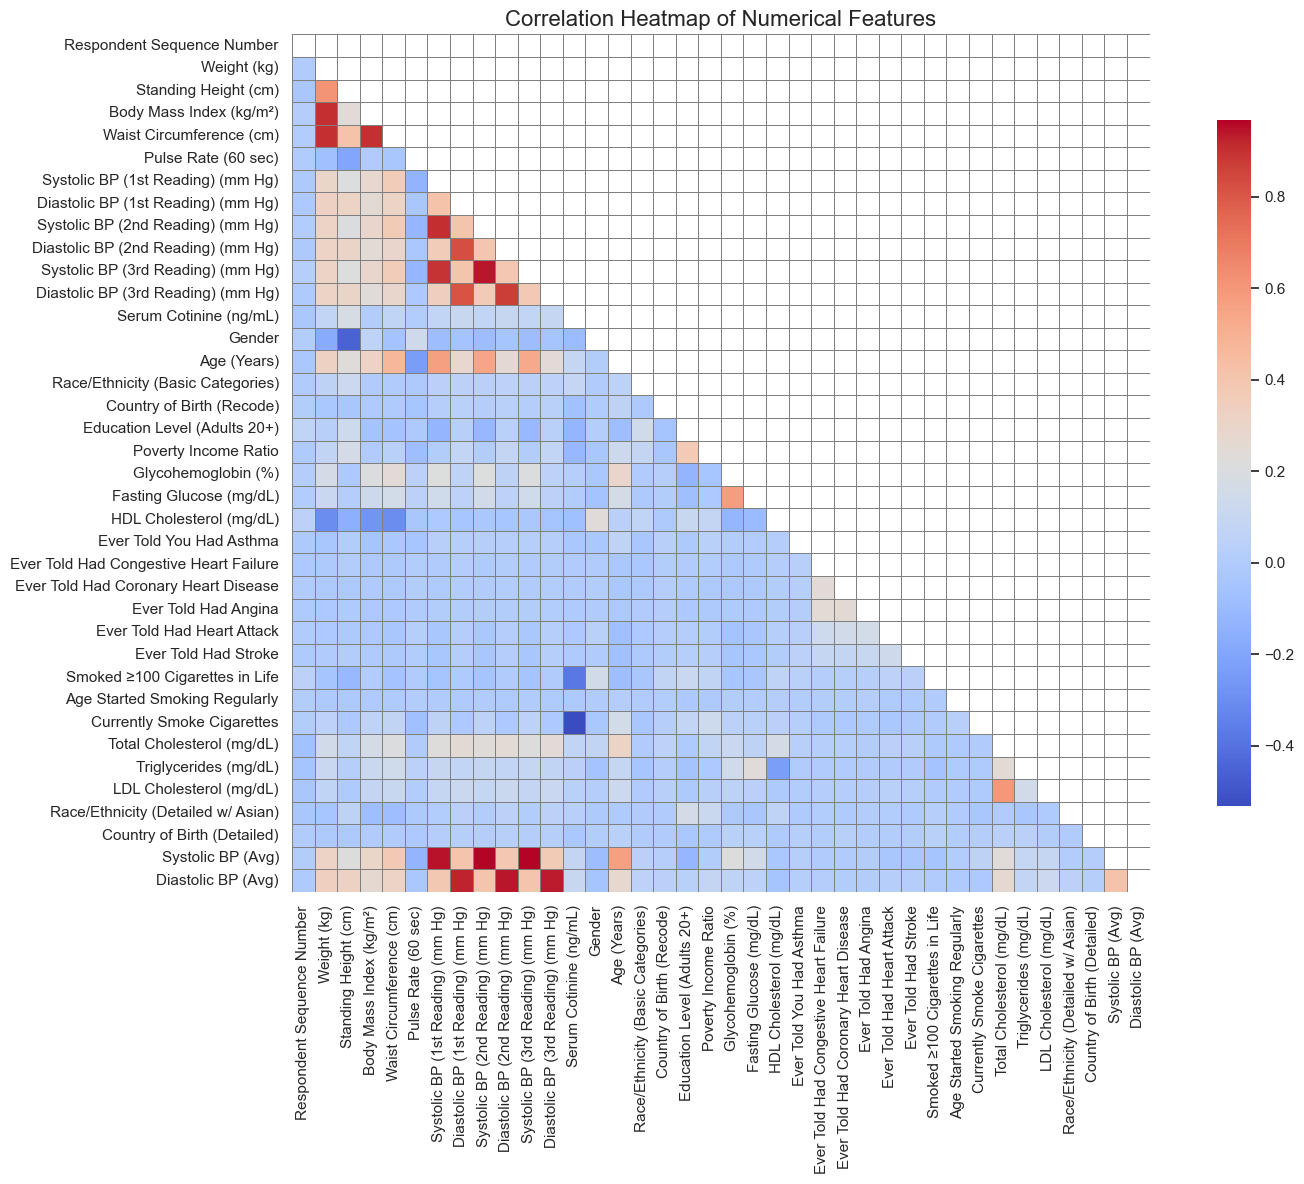

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = cleaned_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the plot size and style
plt.figure(figsize=(16, 12))
sns.set(style="white")

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8},
    mask=np.triu(correlation_matrix)
)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()

# ✅ Save before showing
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

# ✅ Now display it
plt.show()


C:\Users\pritt\AppData\Local\Temp\ipykernel_22724\909996710.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


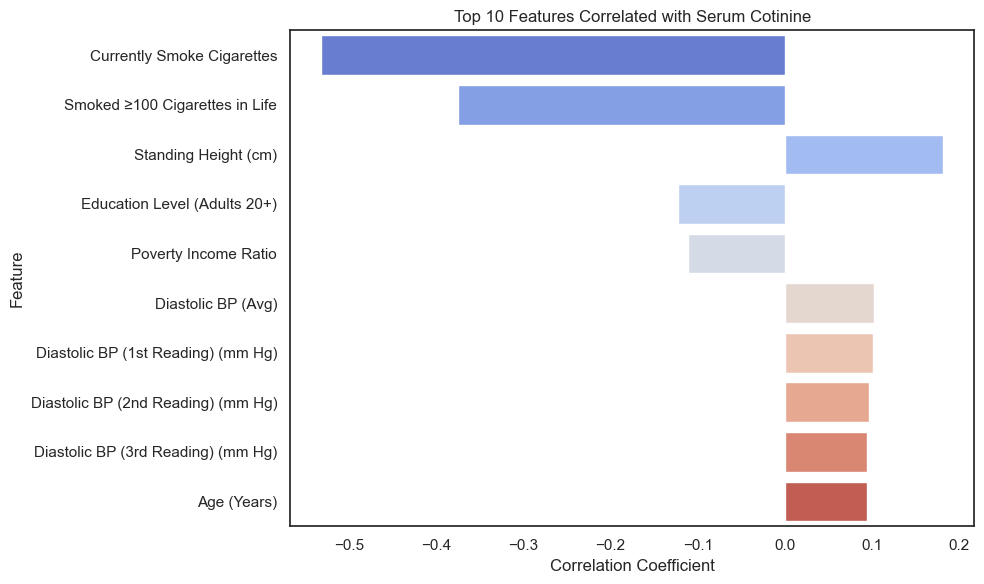

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation of all numerical features with the target
correlation_with_target = numerical_df.corr()['Serum Cotinine (ng/mL)'].drop('Serum Cotinine (ng/mL)')

# Take absolute value to rank by strength (positive or negative)
correlation_with_target_sorted = correlation_with_target.reindex(
    correlation_with_target.abs().sort_values(ascending=False).index
)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_target_sorted[:10].values,
    y=correlation_with_target_sorted[:10].index,
    palette='coolwarm'
)
plt.title("Top 10 Features Correlated with Serum Cotinine")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()

# Save plot
plt.savefig("top_correlated_features.png", dpi=300, bbox_inches='tight')
plt.show()


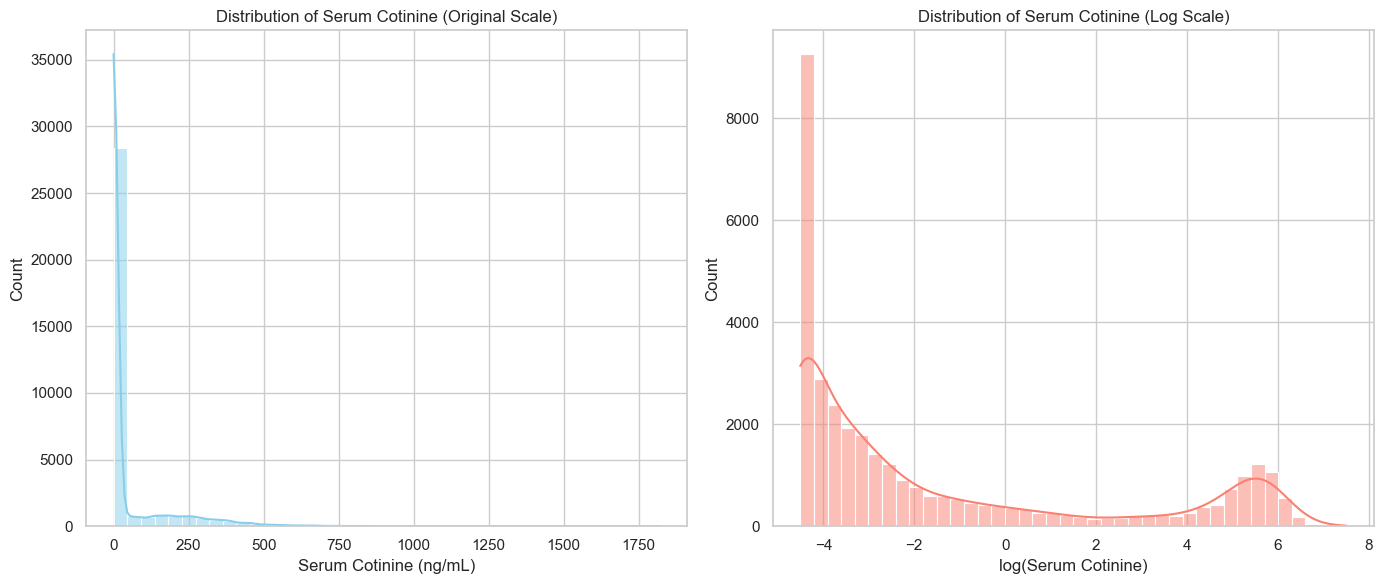

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# Create figure with 2 subplots
plt.figure(figsize=(14, 6))

# Plot 1: Original scale
plt.subplot(1, 2, 1)
sns.histplot(cleaned_df['Serum Cotinine (ng/mL)'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Serum Cotinine (Original Scale)')
plt.xlabel('Serum Cotinine (ng/mL)')
plt.ylabel('Count')

# Plot 2: Log-transformed scale (after filtering out 0 or negative values)
log_cotinine = cleaned_df['Serum Cotinine (ng/mL)'][cleaned_df['Serum Cotinine (ng/mL)'] > 0]
log_cotinine = np.log(log_cotinine)

plt.subplot(1, 2, 2)
sns.histplot(log_cotinine, bins=40, kde=True, color='salmon')
plt.title('Distribution of Serum Cotinine (Log Scale)')
plt.xlabel('log(Serum Cotinine)')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig("serum_cotinine_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


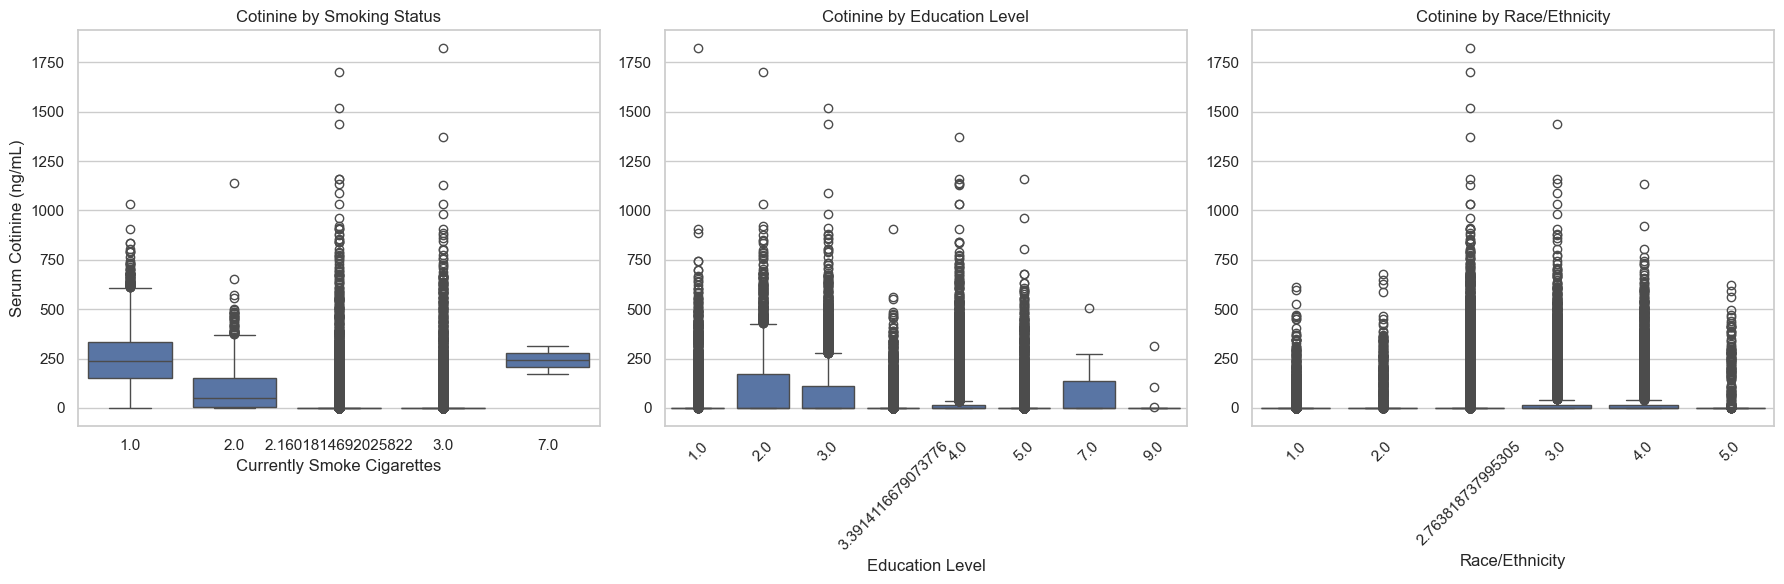

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

# Plot 1: Cotinine vs Smoking Status
plt.subplot(1, 3, 1)
sns.boxplot(x='Currently Smoke Cigarettes', y='Serum Cotinine (ng/mL)', data=cleaned_df)
plt.title('Cotinine by Smoking Status')
plt.xlabel('Currently Smoke Cigarettes')
plt.ylabel('Serum Cotinine (ng/mL)')

# Plot 2: Cotinine vs Education Level
plt.subplot(1, 3, 2)
sns.boxplot(x='Education Level (Adults 20+)', y='Serum Cotinine (ng/mL)', data=cleaned_df)
plt.title('Cotinine by Education Level')
plt.xlabel('Education Level')
plt.ylabel('')
plt.xticks(rotation=45)

# Plot 3: Cotinine vs Race/Ethnicity
plt.subplot(1, 3, 3)
sns.boxplot(x='Race/Ethnicity (Basic Categories)', y='Serum Cotinine (ng/mL)', data=cleaned_df)
plt.title('Cotinine by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("cotinine_boxplots_by_category.png", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot 1: Cotinine by Smoking Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Currently Smoke Cigarettes', y='Serum Cotinine (ng/mL)', data=cleaned_df)
plt.title('Serum Cotinine by Smoking Status')
plt.xlabel('Currently Smoke Cigarettes')
plt.ylabel('Serum Cotinine (ng/mL)')
plt.tight_layout()
plt.savefig("cotinine_by_smoking_status.png", dpi=300, bbox_inches='tight')
plt.close()

# Plot 2: Cotinine by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level (Adults 20+)', y='Serum Cotinine (ng/mL)', data=cleaned_df)
plt.title('Serum Cotinine by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Serum Cotinine (ng/mL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cotinine_by_education.png", dpi=300, bbox_inches='tight')
plt.close()

# Plot 3: Cotinine by Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race/Ethnicity (Basic Categories)', y='Serum Cotinine (ng/mL)', data=cleaned_df)
plt.title('Serum Cotinine by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Serum Cotinine (ng/mL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cotinine_by_race.png", dpi=300, bbox_inches='tight')
plt.close()


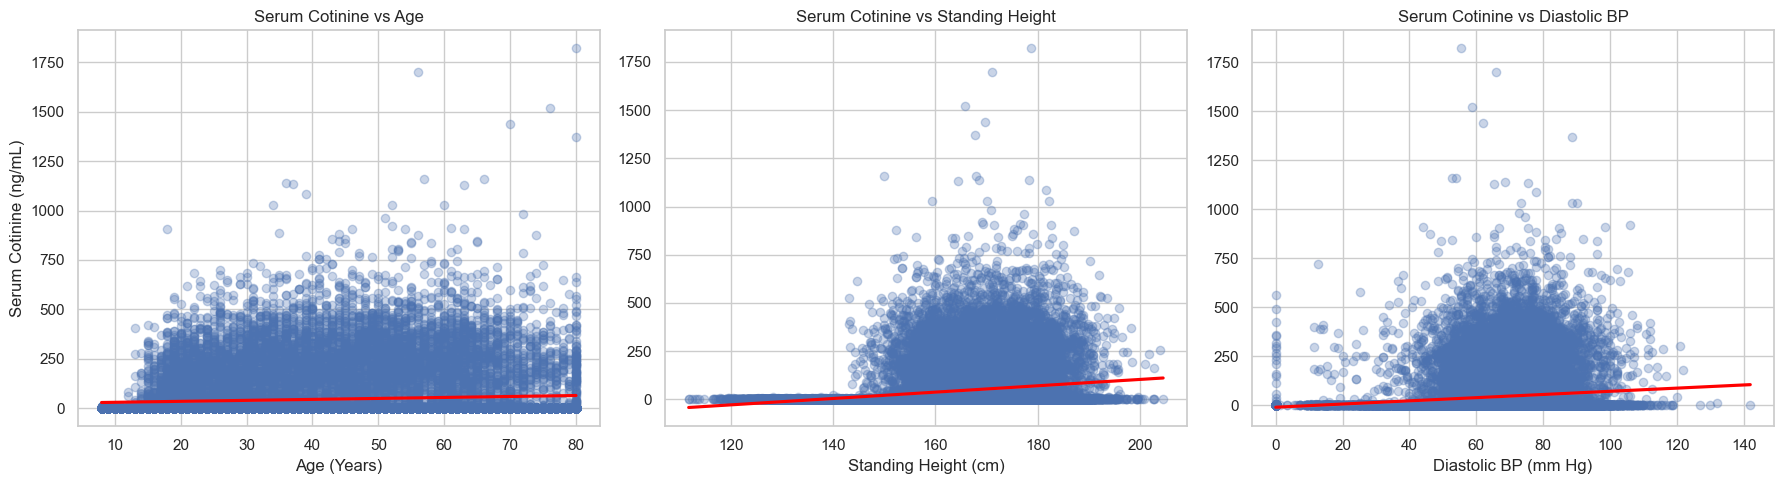

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Plot 1: Cotinine vs Age
plt.subplot(1, 3, 1)
sns.regplot(x='Age (Years)', y='Serum Cotinine (ng/mL)', data=cleaned_df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Serum Cotinine vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Serum Cotinine (ng/mL)')

# Plot 2: Cotinine vs Standing Height
plt.subplot(1, 3, 2)
sns.regplot(x='Standing Height (cm)', y='Serum Cotinine (ng/mL)', data=cleaned_df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Serum Cotinine vs Standing Height')
plt.xlabel('Standing Height (cm)')
plt.ylabel('')

# Plot 3: Cotinine vs Diastolic BP (Avg)
plt.subplot(1, 3, 3)
sns.regplot(x='Diastolic BP (Avg)', y='Serum Cotinine (ng/mL)', data=cleaned_df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Serum Cotinine vs Diastolic BP')
plt.xlabel('Diastolic BP (mm Hg)')
plt.ylabel('')

plt.tight_layout()
plt.savefig("cotinine_vs_continuous_predictors.png", dpi=300, bbox_inches='tight')
plt.show()
